# Covid-19 Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [3]:
df.isnull().sum()

Id                    0
Province_State    13376
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

In [4]:
df.dtypes

Id                  int64
Province_State     object
Country_Region     object
Date               object
ConfirmedCases    float64
Fatalities        float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23256 entries, 0 to 23255
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              23256 non-null  int64  
 1   Province_State  9880 non-null   object 
 2   Country_Region  23256 non-null  object 
 3   Date            23256 non-null  object 
 4   ConfirmedCases  23256 non-null  float64
 5   Fatalities      23256 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Id,ConfirmedCases,Fatalities
count,23256.000000,23256.000000,23256.000000
mean,16356.000000,750.543946,34.440746
std,9451.979462,6008.725072,438.508692
min,1.000000,0.000000,0.000000
25%,8170.750000,0.000000,0.000000
50%,16356.000000,0.000000,0.000000
75%,24541.250000,67.000000,0.000000
max,32711.000000,136675.000000,16523.000000


First of all we're going to convert column "Date" to datetime format and check if that convertion has worked.

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.dtypes

Id                         int64
Province_State            object
Country_Region            object
Date              datetime64[ns]
ConfirmedCases           float64
Fatalities               float64
dtype: object

### Add some columns

Now we're going to add some columns in order to get informations easyer. First, we'll add a "Month" column to filter the exactly month the problem occurs. Then, we're going to add two new columns to explicitly show how many occurrences there were by day: "ConfirmedCases-Day" and "Fatalities-Day" (note that thoses quantities have been added since day one and that shows the overall number). In addition, it'll be very helpfull to treat missing values on "Province_State" column by filling in with "Other", which represents all those unknown places Covid-19 has been detected.

In [9]:
meses = []
for date in df['Date']:
    meses.append(date.month)

In [10]:
df['Month'] = meses
df['Province_State'].fillna('Other', inplace=True)

Finally, let's add "ConfirmedCases-Day" and "Fatalities-Day" columns using the function below. 

In [11]:
def adiciona_colunas(dataframe, coluna, nova_coluna):
    dados = []
    for pais in dataframe['Country_Region'].unique():
        df_pais = dataframe[dataframe['Country_Region'] == pais] # Dataframe dos paises
        for provincia in df_pais['Province_State'].unique():
            dados_provincia = df_pais[df_pais['Province_State'] == provincia] # Dataframe das províncias
            lista = list(dados_provincia[coluna])
            a0 = df_pais[df_pais['Province_State'] == provincia][coluna].values[0]
            for c in range(0, len(lista)):
                if c == 0:
                    dados.append(a0)
                else:
                    a1 = lista[c]
                    a2 = a1 - a0
                    if a2 > 0:
                        dados.append(a2)
                    else:
                        a2 = 0
                        dados.append(a2)
                    a0 = a1
    dataframe[nova_coluna] = dados
    return dataframe

In [12]:
df = adiciona_colunas(df, 'ConfirmedCases', 'ConfirmedCases-Day')
df = adiciona_colunas(df, 'Fatalities', 'Fatalities-Day')

Let's check the new dataframe now. 

In [13]:
df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,Month,ConfirmedCases-Day,Fatalities-Day
0,1,Other,Afghanistan,2020-01-22,0.0,0.0,1,0.0,0.0
1,2,Other,Afghanistan,2020-01-23,0.0,0.0,1,0.0,0.0
2,3,Other,Afghanistan,2020-01-24,0.0,0.0,1,0.0,0.0
3,4,Other,Afghanistan,2020-01-25,0.0,0.0,1,0.0,0.0
4,5,Other,Afghanistan,2020-01-26,0.0,0.0,1,0.0,0.0


That is the dataframe we'll use from now on.

### Plots

Now, we are going to start our data exploratory analysis by ploting some datas that will help us to have a better understanding about our dataset. First of all, let´s check the evolution of confirmed cases and fatalities throug time. Here, we're considering the numbers for each day cases.

- Confirmed cases

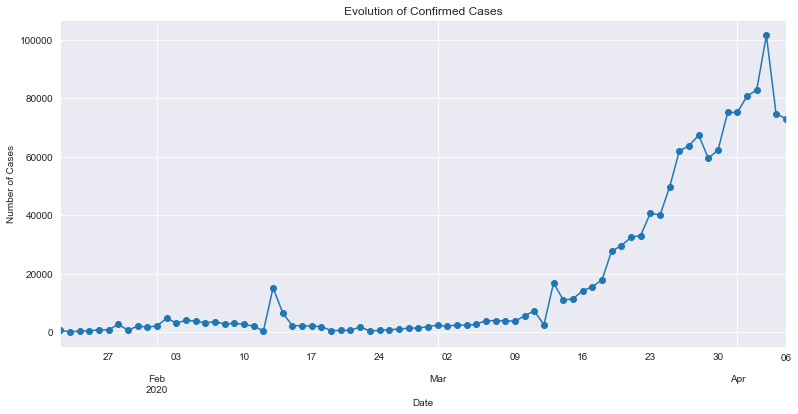

In [14]:
fig = plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
df.groupby(['Date'])['ConfirmedCases-Day'].sum().plot(marker='o')
plt.title('Evolution of Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.show()

- Fatalities

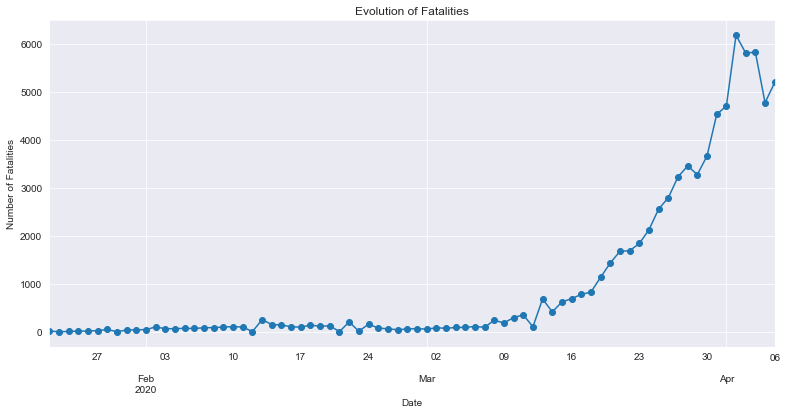

In [15]:
fig = plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
df.groupby(['Date'])['Fatalities-Day'].sum().plot(marker='o')
plt.title('Evolution of Fatalities')
plt.xlabel('Date')
plt.ylabel('Number of Fatalities')
plt.show()